### Data Science Assessment Data Usage/ Visualisation

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Initial EDA of dataset


In [30]:
# import dataset
dataset = pd.read_csv('Datasets/Diabetes-Dataset-Cleaned-2.csv')

dataset.info(), dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   float64
 3   BloodPressure             2768 non-null   float64
 4   BMI                       2768 non-null   float64
 5   DiabetesPedigreeFunction  2768 non-null   float64
 6   Age                       2768 non-null   int64  
 7   Outcome                   2768 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 173.1 KB


(None,
    Id  Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  \
 0   1            6    148.0           72.0  33.6                     0.627   
 1   2            1     85.0           66.0  26.6                     0.351   
 2   3            8    183.0           64.0  23.3                     0.672   
 3   4            1     89.0           66.0  28.1                     0.167   
 4   5            0    137.0           40.0  43.1                     2.288   
 
    Age  Outcome  
 0   50        1  
 1   31        0  
 2   32        1  
 3   21        0  
 4   33        1  )

#### Initial Visualisation of Data

C:\Users\mattw\AppData\Local\Temp\ipykernel_15916\3496588374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataset, palette='pastel')


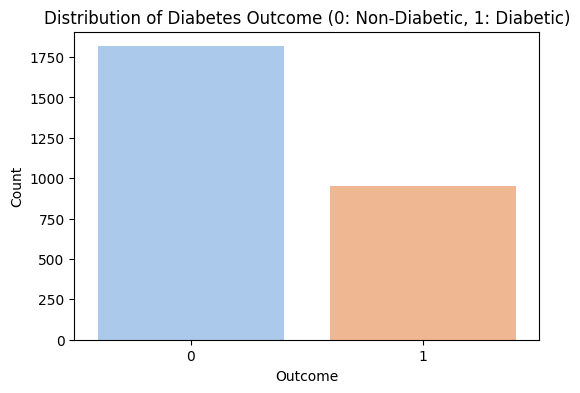

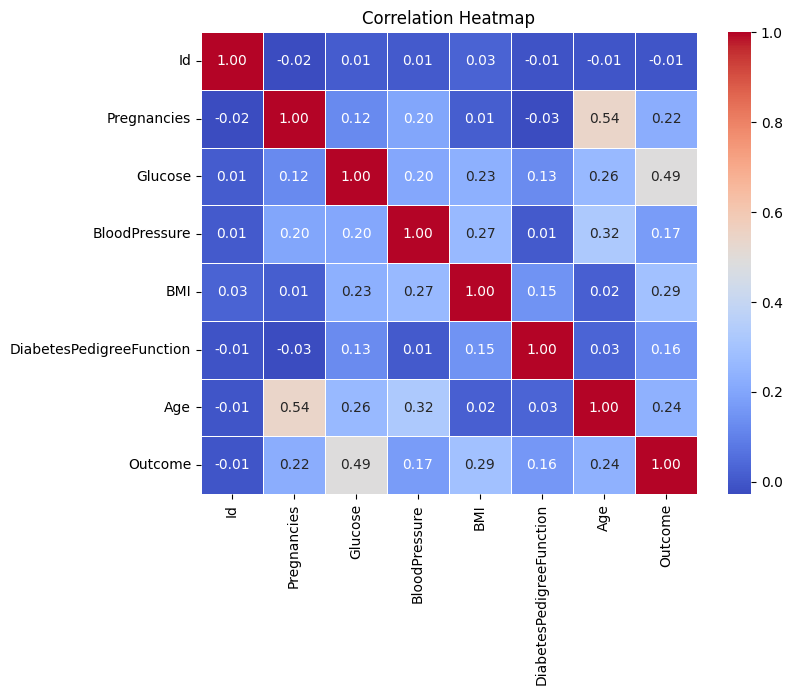

In [31]:
# 2. Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=dataset, palette='pastel')
plt.title('Distribution of Diabetes Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the code above, we can see from the correlation heatmap that variables such as glucose, BMI and Age have a larger Correlation with the Outcome variables (To either have Diabetes or not). This gives us a good marker of what features we could do further analysis on

In [33]:
# 2. Data Distribution
# Outcome distribution
outcome_distribution = dataset['Outcome'].value_counts(normalize=True) * 100
print(outcome_distribution)



# 4. Feature Interactions
# Grouped averages by Outcome
grouped_means = dataset.groupby('Outcome').mean()
print(grouped_means)

Outcome
0    65.606936
1    34.393064
Name: proportion, dtype: float64
                  Id  Pregnancies     Glucose  BloodPressure        BMI  \
Outcome                                                                   
0        1388.143722     3.204295  111.090833      70.910400  31.105279   
1        1377.549370     4.769958  142.505422      75.253387  35.441579   

         DiabetesPedigreeFunction        Age  
Outcome                                       
0                        0.433316  31.111233  
1                        0.543445  36.987395  
